# Brainstation Capstone Project

## Data Science Bootcamp: November 2023 - February 2024

Welcome to my Capstone Project for the Brainstation Data Science Bootcamp. This project represents the culmination of intensive learning and hands-on experience in data science from November 2023 to February 2024.

# Project Overview

## Project Description
This capstone project is centered around developing a predictive analysis tool in medical data science, focusing on diseases like heart failure, stroke, diabetes, and cancer. The aim is to create a model that predicts the likelihood of these health conditions based on medical and demographic data.

## Objective
The primary goal is to leverage data science and machine learning to provide early warnings for critical health conditions, aiding in early diagnosis and improving patient outcomes.

## Key Challenges
- **Data Quality and Reliability**: Ensuring the datasets used are accurate and reliable.
- **Model Accuracy and Validation**: Building models that are not only accurate but also clinically valid.
- **Handling Imbalanced Data**: Dealing with the common issue of imbalanced datasets in medical data.
- **Ethical Considerations**: Addressing data privacy and ethical concerns in predictive healthcare analytics.

## Technologies Used
- **Programming Languages**: Python, including libraries like Pandas, NumPy, and Scikit-learn.
- **Data Visualization**: Using Matplotlib and Seaborn for insights visualization.
- **Machine Learning Frameworks**: Exploring TensorFlow or PyTorch for advanced modeling.

## Expected Outcomes
- **Project**: A robust predictive model for disease risk assessment.
- **Personal Development**: Improved expertise in data science and machine learning, with a focus on healthcare applications.

## Why This Project?
I am deeply interested in the convergence of data science and healthcare. This project offers the opportunity to impact patient care through predictive analytics, aligning with my passion for applying data science to solve real-world problems and enhancing my skills in this critical area.


---

Feel free to explore the different sections of this notebook to see the progress, analysis, and results of my capstone project. I appreciate any feedback or suggestions!


# Masoud Arefi

Welcome to my professional portfolio in Data Science. Below are links to my LinkedIn profile and GitHub repository where you can find my projects and contributions.

## Connect with Me

- [LinkedIn](https://www.linkedin.com/in/masoud-arefi/)
- [GitHub](https://github.com/MaSOouD69/capstone-repo)

### About Me

I am a passionate data science professional with a keen interest in developing insightful data-driven solutions. My expertise lies in leveraging analytical tools and machine learning techniques to unravel complex data challenges.

Feel free to explore my projects and reach out for collaborations or discussions!


# First Data set 
# Heart Stroke Prediction and Analysis

## Introduction

Heart strokes significantly impact global health, with a surprising fact: 80% of heart strokes are preventable. This notebook explores key indicators leading to heart strokes, using data from diverse age groups, genders, habits, and health issues. Our visualizations aim to be intuitive, employing simple yet effective methods for conveying essential information.

## Problem Statement

Our goal is to visualize the relationships between various lifestyle habits and heart stroke occurrences. We aim to predict stroke probability using optimally tuned models, providing insights for preventive health measures.

## Questions and Assumptions

In this analysis, we will investigate several questions and assumptions:

1. **Impact of Age**: Does age significantly influence stroke occurrence, and what is its distribution across populations?
2. **BMI and Glucose Levels**: How do higher body mass index and glucose levels correlate with stroke risk?
3. **Smoking and Stroke Risk**: Is there a strong link between smoking and increased stroke risk?
4. **Heart Disease and Stroke**: How closely are existing heart diseases and stroke occurrences related?
5. **Workload and Blood Pressure**: Can high workload and resultant blood pressure increases lead to strokes?
6. **Gender-Specific Risks**: Are males more prone to strokes due to work-related stress, or do risks vary across genders?

## Methodology

- **Data Analysis**: Comprehensive examination of the dataset to understand feature distribution and relationships.
- **Visualizations**: Using plots and charts to uncover patterns and insights.
- **Statistical Testing**: Validating assumptions and hypotheses through statistical methods.
- **Model Building**: Developing predictive models for stroke risk estimation.
- **Feature Importance**: Identifying key factors that significantly influence stroke risk.
- **Feature Selection**: Enhancing model accuracy by selecting relevant features.

## Conclusion

This notebook aims to provide a deeper understanding of the factors leading to heart strokes and their interplay, essential for developing preventive strategies and early interventions.


In [1]:
# libraries import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as xp

In [2]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

In [3]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


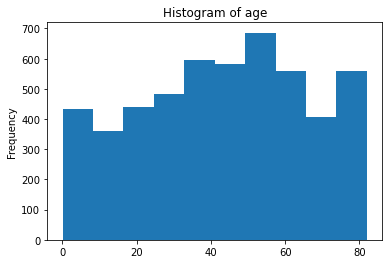

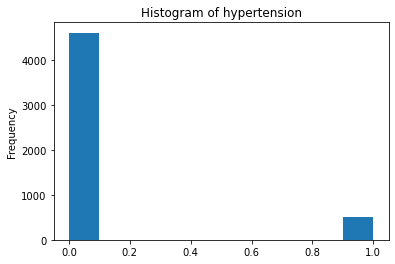

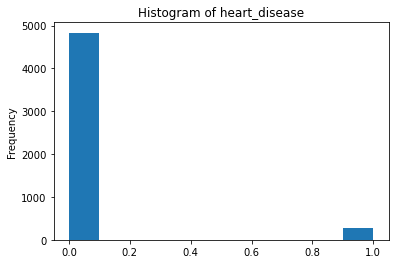

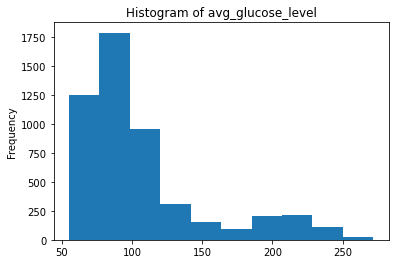

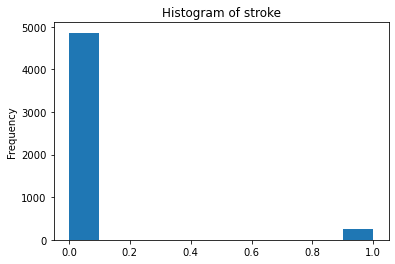

In [5]:
# Loop through each column and plot a histogram for each numeric columns
for i in ['age','hypertension','heart_disease','avg_glucose_level','stroke']:
    plt.figure()  # Create a new figure for each plot
    df[i].plot(kind='hist')
    plt.title(f'Histogram of {i}')
    plt.show()  # Display the plot

From histogramof Stroke distribution it is clear that every 5 people out of 100 people are having strokes from our sampling data. Moreover,this is a highly unbalanced data distribution, and null accuracy score of this distribution it self is 95%, whcih imploys any dump model should randomly predictions of stroke could reach accuracy of 95%. So, while modeling and training data, either over sampling or under sampling has to be done to obtain best results.

In [6]:
# stats of categorical data
round (df.describe(exclude = ['float', 'int64']),2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


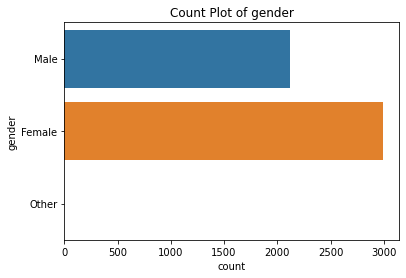

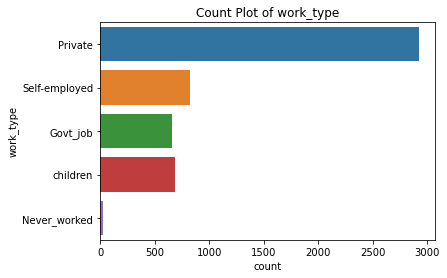

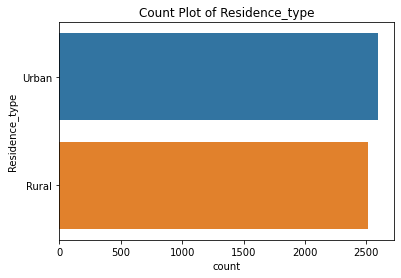

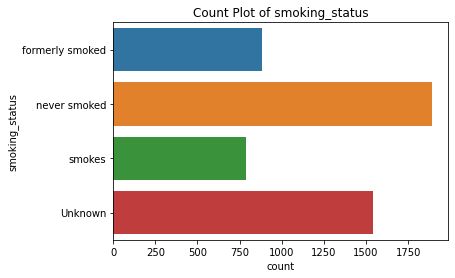

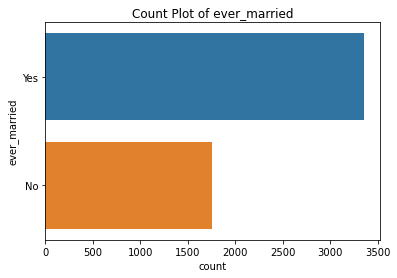

In [7]:
non_num_df = ['gender','work_type','Residence_type','smoking_status','ever_married']
for i in non_num_df:
    plt.figure()  # Create a new figure for each p
    
    # For non-numeric data, use a count plot
    sns.countplot(y=df[i], data=df)
    plt.title(f'Count Plot of {i}')

    plt.show()  # Display the plot

In [8]:
df[['gender','work_type','Residence_type','smoking_status','ever_married']].head()

,gender,work_type,Residence_type,smoking_status,ever_married
0,Male,Private,Urban,formerly smoked,Yes
1,Female,Self-employed,Rural,never smoked,Yes
2,Male,Private,Rural,never smoked,Yes
3,Female,Private,Urban,smokes,Yes
4,Female,Self-employed,Rural,never smoked,Yes


In [9]:
# look at null values
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
# Filter the DataFrame for rows where 'bmi' is null
df_null_bmi = df[df['bmi'].isna()]
df_null_bmi.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1


Use visalization for null values

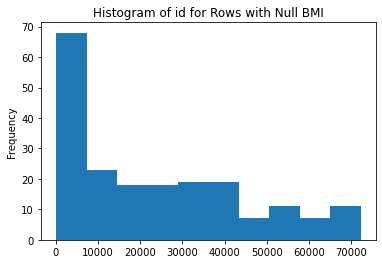

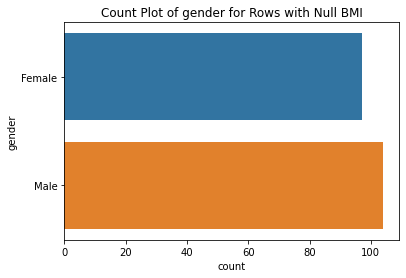

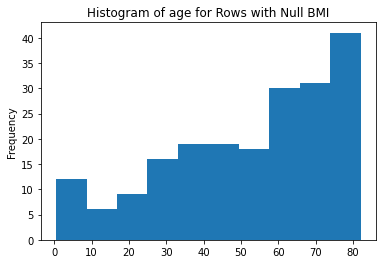

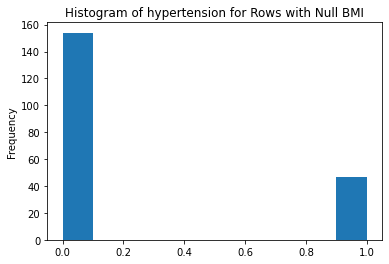

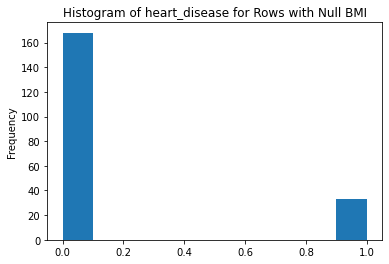

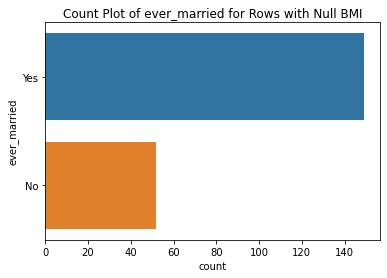

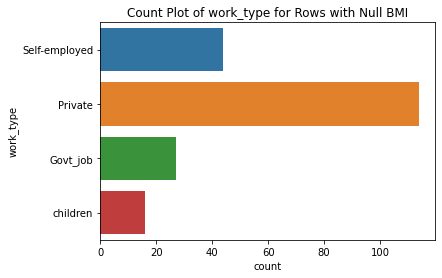

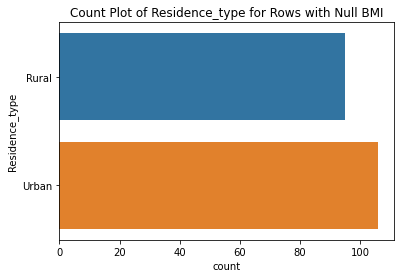

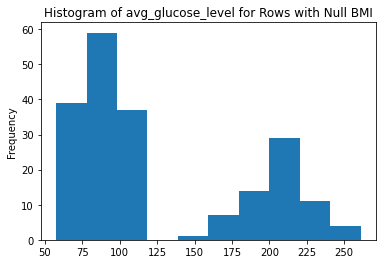

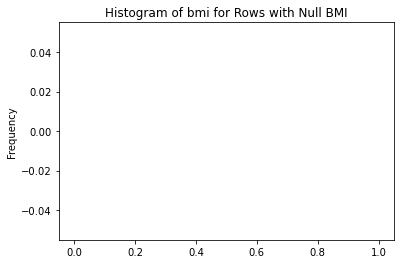

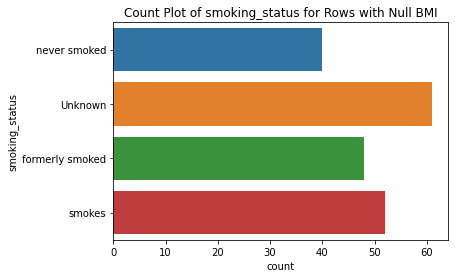

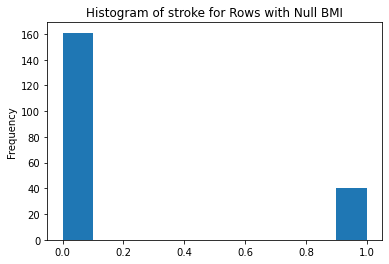

In [11]:
# Filter the DataFrame for rows where 'bmi' is null
df_null_bmi = df[df['bmi'].isna()]

# Loop through each column
for i in df_null_bmi.columns:
    plt.figure()  # Create a new figure for each plot

    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df_null_bmi[i]):
        df_null_bmi[i].plot(kind='hist')
        plt.title(f'Histogram of {i} for Rows with Null BMI')
    else:
        # For non-numeric data, use a count plot
        sns.countplot(y=i, data=df_null_bmi)
        plt.title(f'Count Plot of {i} for Rows with Null BMI')

    plt.show()  # Display the plot

As we observe the visuals for both the entire DataFrame and the subset with null BMI values, the most standout feature is the 'glucose' column. Let's take a closer look at distributions.

Text(0.5, 1.0, 'Histogram of avg_glucose_level for Rows with Null BMI')

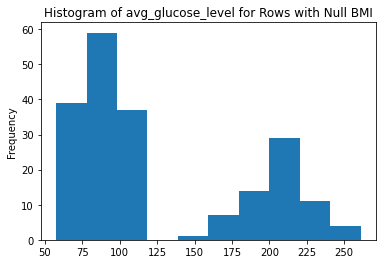

In [12]:
# avg_glucose_level for whole dataframe
df_null_bmi['avg_glucose_level'].plot(kind='hist')
plt.title(f'Histogram of avg_glucose_level for Rows with Null BMI')

Text(0.5, 1.0, 'Histogram of avg_glucose_level')

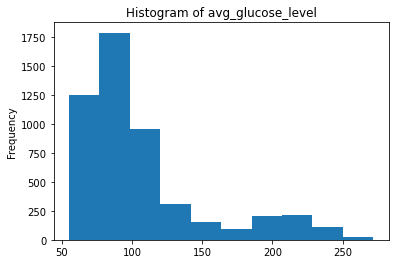

In [13]:
    # # avg_glucose_level for whole dataframe
    df['avg_glucose_level'].plot(kind='hist')
    plt.title('Histogram of avg_glucose_level')

The distribution of average glucose levels shows noticeable differences between the original dataset and the subset with missing BMI values. Notably, 4 percent of the data is missing, and this missingness does not appear to be random. To address this, it's advisable to retain the records with missing BMI values. However, adding a new column to indicate whether the BMI is missing could be beneficial for machine learning methods. This approach allows us to maintain data integrity while providing a clear indicator for our models to handle these missing values appropriately.

In [14]:
# deal with missing data
df['missing bmi'] = df['bmi'].isna()

In [29]:
df['bmi'].isna().sum()

0

In [16]:
#check for duplicate rows
df.duplicated().sum()

0

There is no duplicated record in the data set

In [17]:
# fill missing data with median
df['bmi'] = df['bmi'].fillna(round (df['bmi'].median(), 2))

In [18]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
missing bmi          0
dtype: int64

In [19]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,missing bmi
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,False
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,True
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,False
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,False
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,False


# Dataset Overview

Our dataset contains a mix of categorical and numerical features, with a focus on health-related measurements. Here's a breakdown of the features:

## Categorical Features
- `gender`: Gender of the individual
- `ever_married`: Marital status
- `work_type`: Type of occupation
- `Residence_type`: Type of residence (Urban/Rural)
- `smoking_status`: Smoking status

## Binary Numerical Features
- `hypertension`: Presence of hypertension (0 = No, 1 = Yes)
- `heart_disease`: Presence of heart disease (0 = No, 1 = Yes)
- `stroke`: Occurrence of stroke (0 = No, 1 = Yes)

## Continuous Numerical Features
- `age`: Age of the individual
- `avg_glucose_level`: Average glucose level in blood
- `bmi`: Body Mass Index

**Note**: The `bmi` feature has missing data that needs to be addressed. Most of our data is categorical, which will require special attention for visualization. For feature extraction, we can consider binning the continuous features (age, avg_glucose_level, and bmi) while keeping other features as they are.


### Story telling with data

### Data Binning Strategies

In our analysis, we'll be binning several key variables to categorize our data more effectively. Below are the binning strategies for Body Mass Index (BMI), age, and average glucose levels, along with references for each categorization method.

#### Body Mass Index (BMI) Binning

BMI is a key health indicator used to categorize individuals into different weight statuses. The binning of BMI will be based on standard medical categories. 

Reference: [Body Mass Index Categories](https://www.medicalnewstoday.com/articles/323446#body-mass-index)

#### Age Binning

Categorizing individuals into different life stages based on age can be particularly relevant in studies where age is a significant factor.

Reference: [Age and Physical Description](https://kidspicturedictionary.com/english-through-pictures/people-english-through-pictures/age-physical-description/)

#### Average Glucose Level Binning

Binning average glucose levels helps in categorizing individuals based on their blood sugar levels, crucial in studies related to diabetes and metabolic health.

Reference: [Normal Blood Sugar Level Chart](https://agamatrix.com/blog/normal-blood-sugar-level-chart/)


In [20]:
# Binning continuous features for better categorization
df['age_category'] = pd.cut(df['age'], bins=[0, 18, 35, 60, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
df['glucose_category'] = pd.cut(df['avg_glucose_level'], bins=[0, 90, 140, 200, 500], labels=['Low', 'Normal', 'High', 'Very High'])
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Display the first few rows of the modified DataFrame
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,missing bmi,age_category,glucose_category,bmi_category
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,False,Senior,Very High,Obese
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,True,Senior,Very High,Overweight
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,False,Senior,Normal,Obese
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,False,Adult,High,Obese
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,False,Senior,High,Normal


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   object  
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   int64   
 4   heart_disease      5110 non-null   int64   
 5   ever_married       5110 non-null   object  
 6   work_type          5110 non-null   object  
 7   Residence_type     5110 non-null   object  
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                5110 non-null   float64 
 10  smoking_status     5110 non-null   object  
 11  stroke             5110 non-null   int64   
 12  missing bmi        5110 non-null   bool    
 13  age_category       5110 non-null   category
 14  glucose_category   5110 non-null   category
 15  bmi_category       5110 non-null   category
dtypes: boo

##### take a closer look at data with ratio of stroke

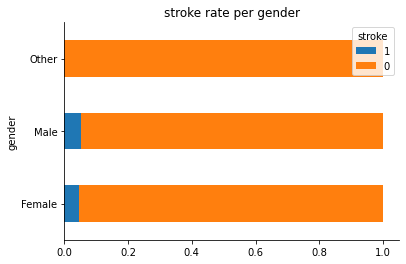

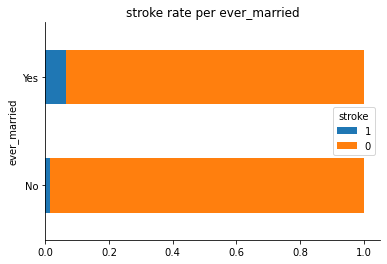

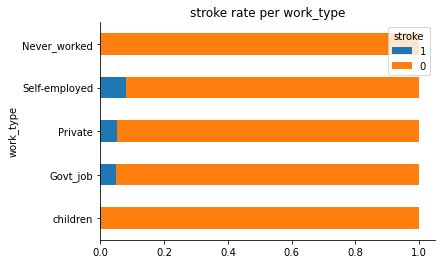

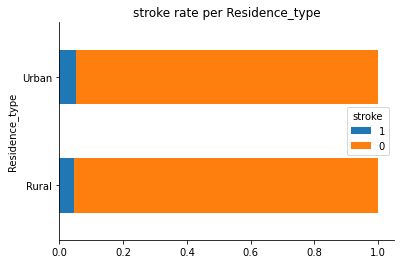

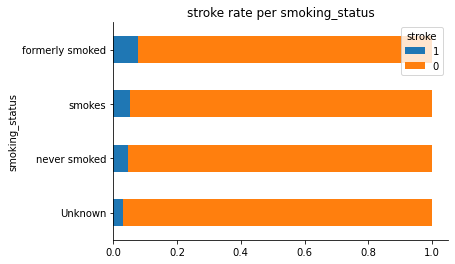

In [22]:
# visaalization for columns with object data type
for col in df.select_dtypes('object').columns:
    rate_data = df.groupby([col,'stroke'])['stroke'].count() / df.groupby(col)['stroke'].count()
    
    rate_data.unstack()[[1,0]].sort_values(1).plot(kind='barh',stacked=True)
    plt.title(f"stroke rate per {col}")
    sns.despine()
    plt.show()
    

##### now for numeric data

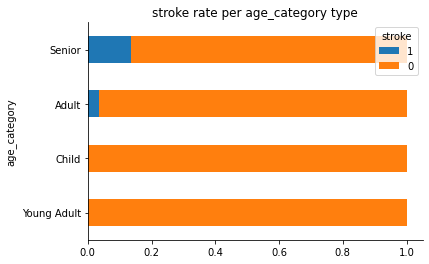

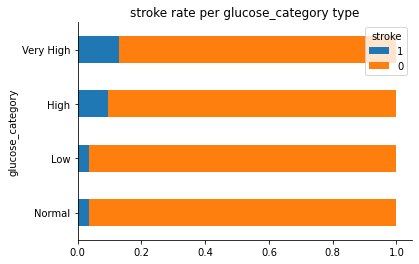

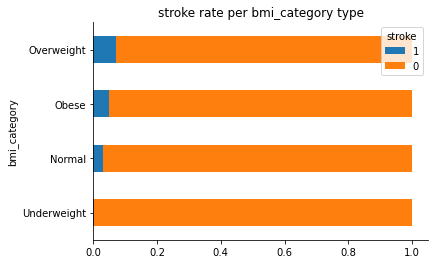

In [23]:
#  visaalization for columns with category data type
for col in df.select_dtypes('category').columns:
    rate_data = df.groupby([col,'stroke'])['stroke'].count() / df.groupby(col)['stroke'].count()
    
    rate_data.unstack()[[1,0]].sort_values(1).plot(kind='barh',stacked=True)
    plt.title(f"stroke rate per {col} type")
    sns.despine()
    plt.show()

Does marriage result in a higher incidence of stroke? Considering that children are typically unmarried, we will demonstrate analysis on adults and seniors to examine the stroke ratio in relation to marital status

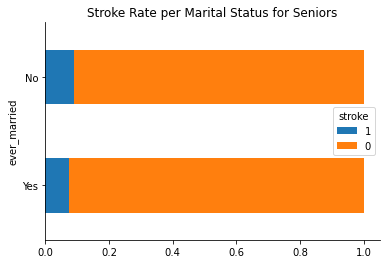

In [41]:
# Filter the DataFrame for seniors
senior_df = df[df['age_category'].isin(['Senior', 'Adult'])]

# Calculate the rate
rate_data = senior_df.groupby(['ever_married', 'stroke'])['stroke'].count() / senior_df.groupby('ever_married')['stroke'].count()

# Unstack, sort, and plot
rate_data.unstack().sort_values(by=1)[[1, 0]].plot(kind='barh', stacked=True)
plt.title("Stroke Rate per Marital Status for Seniors")
sns.despine()
plt.show()

As the visual analysis indicates, the ratio of stroke incidence among adults and seniors appears to be similar for both married and unmarried groups.

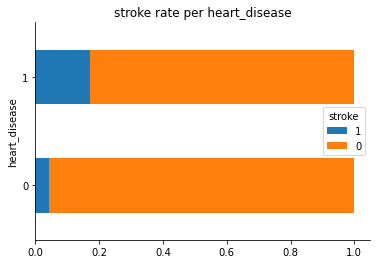

In [24]:
#visualization with numeric data type (heart disease)
rate_data = df.groupby(['heart_disease','stroke'])['stroke'].count() / df.groupby('heart_disease')['stroke'].count()
    
rate_data.unstack()[[1,0]].sort_values(1).plot(kind='barh',stacked=True)
plt.title(f"stroke rate per heart_disease")
sns.despine()
plt.show()

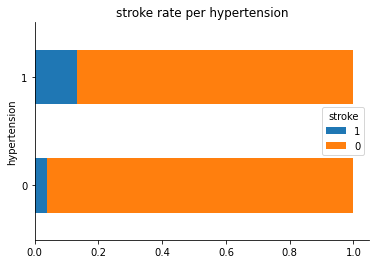

In [25]:
#visualization with numeric data type ()
rate_data = df.groupby(['hypertension','stroke'])['stroke'].count() / df.groupby('hypertension')['stroke'].count()
    
rate_data.unstack()[[1,0]].sort_values(1).plot(kind='barh',stacked=True)
plt.title(f"stroke rate per hypertension")
sns.despine()
plt.show()

###### Let's examine the relationship between glucose levels and the incidence of stroke. Does a higher glucose level correlate with an increased risk of stroke?

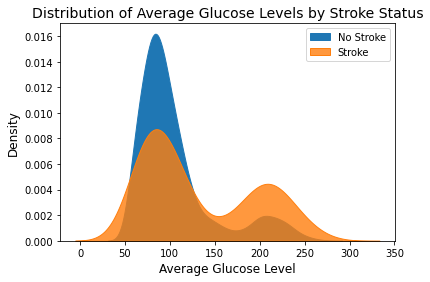

In [57]:
# Plotting the data
# 'No Stroke' group
sns.kdeplot(data=df[df['stroke'] == 0], x='avg_glucose_level', shade=True, alpha=1,label='No Stroke')
# 'Stroke' group
sns.kdeplot(data=df[df['stroke'] == 1], x='avg_glucose_level', shade=True, alpha=0.8, label='Stroke')

# Setting the title and labels
plt.title('Distribution of Average Glucose Levels by Stroke Status', fontsize=14)
plt.xlabel('Average Glucose Level', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Adding a legend to show which color corresponds to which group
plt.legend()

# Display the plot
plt.show()
